[1664.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


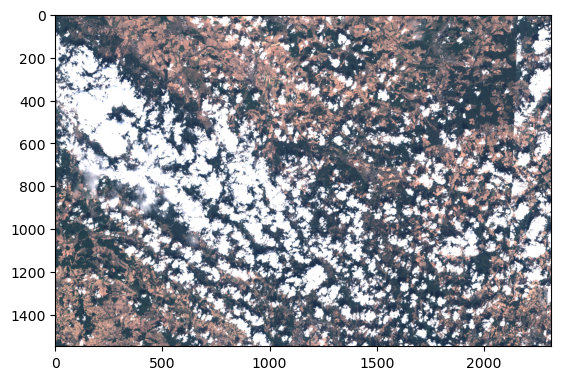

In [1]:
import os 
import rasterio 
import matplotlib.pyplot as plt
import datetime
import numpy as np
from tqdm import tqdm
import rasterio
from rasterio.features import geometry_mask
import fiona
import warnings
import xarray as xr
import geopandas as gpd
import pandas as pd

warnings.filterwarnings("ignore")


path = '/work/users/jn906hluu/S2_Frankenwald_daily/'
list_dir = os.listdir(path)
shape_file_path = '/work/users/jn906hluu/RSP/ForestCoverPatternStudy/Layers/D48/D48.shp'

quicklook_dir = '/work/users/jn906hluu/to_gif_quartal/'

folder = list_dir[22]
    
image_path = path + folder + '/response.tiff'

with rasterio.open(image_path) as dataset:
    red_channel = dataset.read(4) / 10000
    green_channel = dataset.read(3) / 10000
    blue_channel = dataset.read(2) / 10000
    cloud_mask = dataset.read(13)

    print([np.median(dataset.read())])

    plt.imshow(3.5 * np.dstack((red_channel, green_channel, blue_channel)))


1. The first cell imports the necessary libraries for the script, including os for interacting with the file system, rasterio for working with raster data, matplotlib.pyplot for creating visualizations, datetime for working with dates and times, numpy for numerical operations, and tqdm for creating progress bars.
2. The `path` variable is set to a specific file path where the images are located. 
3. `list_dir` variable is used to list all the directories in that path.
4. `shape_file_path` variable is set to the path of the shape file.
5. `quicklook_dir` variable is set to the directory where the gifs will be saved.
7. `image_path` variable is set to the path of the image by combining the path and folder variable
8. A context manager is opened using rasterio.open(image_path) to open the image file and read the red, green and blue channels. The values of the channels are divided by 10000. This is necessary as they come with this scaling. 
The `plt.imshow` function is used to display the image with red, green, blue channels combined and scaled by 3.5.

Useful links:
- This is the definition for all the indices: `https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/`
- 


In [2]:
shapefile = gpd.read_file(shape_file_path)

# Open the raster file
with rasterio.open(image_path) as src:
    # Get the CRS of the raster file
    raster_crs = src.crs
    # Get the shape of the raster file
    raster_shape = src.shape

    shapefile = shapefile.to_crs(src.crs)
    # Get the transform of the raster file
    raster_transform = src.transform
    geometry = shapefile.geometry
    # Create a mask from the geometry
    mask_tw = geometry_mask([geometry[0]], raster_shape, raster_transform, invert=True)
    mask_fw = geometry_mask([geometry[1]], raster_shape, raster_transform, invert=True)
    mask_all = ~mask_fw & ~mask_tw


Text(0.5, 1.0, 'Joined Mask')

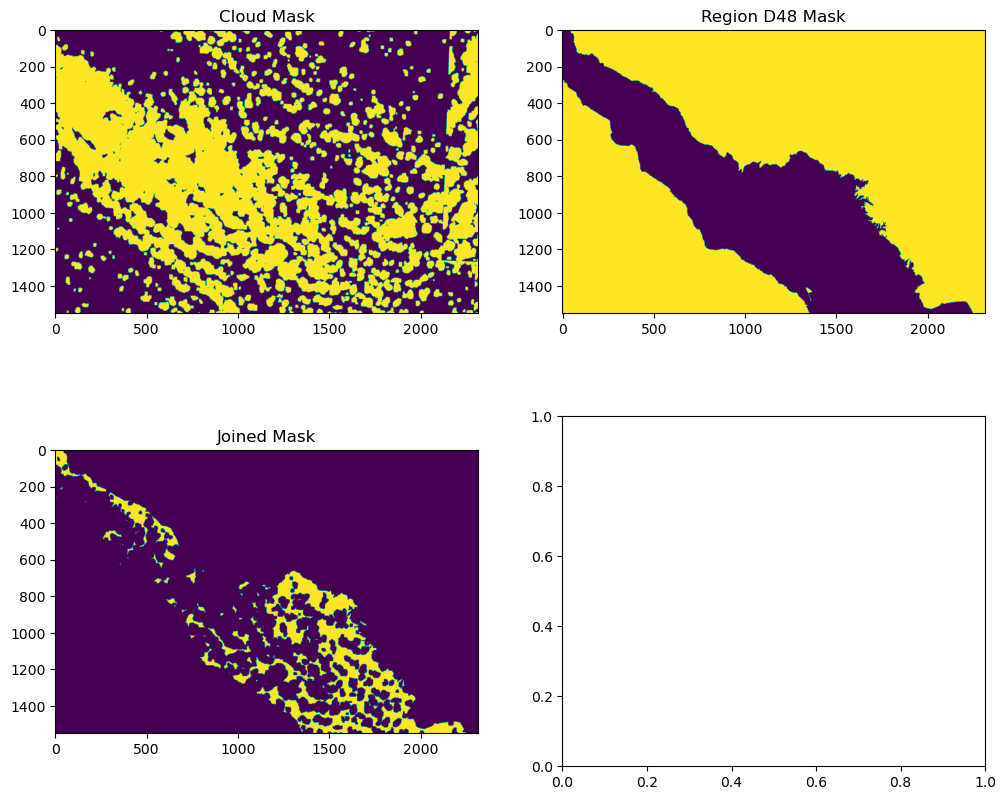

In [5]:
path = '/work/users/jn906hluu/S2_Frankenwald_daily/'
CM_path = '/work/users/jn906hluu/S2_Frankenwald_daily_CM/'
example_image_path = CM_path + os.listdir(path)[22] + '/response.tiff'

with rasterio.open(example_image_path) as dataset:

    cloud_mask_channel = dataset.read(1) > 1

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0,0].imshow(cloud_mask_channel)
axs[0,0].set_title('Cloud Mask')
axs[0,1].imshow(mask_all)
axs[0,1].set_title('Region D48 Mask')
axs[1,0].imshow((~cloud_mask_channel & ~mask_all))
axs[1,0].set_title('Joined Mask')
#axs[1,1].imshow(mask_full)

In [6]:
def NDVI(mir, nir):
    return (mir - nir) / (mir + nir)

def NDMI(red, mir):
    return (red - mir) / (red + mir)

def BRI(green, red, nir):
    (1 / green - 1 / red) / nir

def SLAVI(nir, red, swir):
    return (nir / (red + swir))

def AFRI1600(nir, aerosol):
    return nir - 0.66 * (aerosol  / (nir + 0.66 * aerosol))

 

In [7]:
path = '/work/users/jn906hluu/S2_Frankenwald_daily/'
CM_path = '/work/users/jn906hluu/S2_Frankenwald_daily_CM/'
#image_path = CM_path + folder + '/response.tiff'

list_dir = os.listdir(path)


data_dict = dict(
    time = [],
    ndvi = [],
    ndmi = [],
    bri = [],
    slavi = [],
    mask = [],
    ndre = [],
    afri = [],
    )

for folder in list_dir:
    image_path = path + folder + '/response.tiff'
    cm_mask_path = CM_path + folder + '/response.tiff'

    with rasterio.open(cm_mask_path) as dataset:

        cloud_mask_channel = dataset.read(1) > 1

    with rasterio.open(image_path) as dataset:

        mask_full = ~cloud_mask_channel & ~mask_all
        #channel_1 = dataset.read(1) / 10000
        #channel_2 = dataset.read(2) / 10000
        #channel_3 = dataset.read(3) / 10000
        channel_4 = dataset.read(4) / 10000
        channel_5 = dataset.read(5) / 10000
        #channel_6 = dataset.read(6) / 10000
        #channel_7 = dataset.read(7) / 10000
        channel_8 = dataset.read(8) / 10000
        channel_9 = dataset.read(9) / 10000
        #channel_10 = dataset.read(10) / 10000
        channel_11 = dataset.read(11) / 10000
        #channel_12 = dataset.read(12) / 10000

        #masked_channel_1 = np.ma.array(channel_1, mask=mask_full)
        #masked_channel_2 = np.ma.array(channel_2, mask=mask_full)
        #masked_channel_3 = np.ma.array(channel_3, mask=mask_full)
        masked_channel_4 = np.ma.array(channel_4, mask=mask_full)
        masked_channel_5 = np.ma.array(channel_5, mask=mask_full)
        #masked_channel_6 = np.ma.array(channel_6, mask=mask_full)
        #masked_channel_7 = np.ma.array(channel_7, mask=mask_full)
        masked_channel_8 = np.ma.array(channel_8, mask=mask_full)
        masked_channel_9 = np.ma.array(channel_9, mask=mask_full)
        #masked_channel_10 = np.ma.array(channel_10, mask=mask_full)
        masked_channel_11 = np.ma.array(channel_11, mask=mask_full)
        #masked_channel_12 = np.ma.array(channel_12, mask=mask_full)


        ndvi = NDVI(masked_channel_8, masked_channel_4)
        ndre = NDVI(masked_channel_9, masked_channel_5)
        afri = AFRI1600(masked_channel_9, masked_channel_11)
        #ndmi = NDMI(masked_channel_8, masked_channel_11)
        #bri = BRI(masked_channel_3, masked_channel_5, masked_channel_9)
        #slavi = SLAVI(masked_channel_9, masked_channel_5, masked_channel_12)

        #ndmi = (masked_nir - masked_mir ) / (masked_nir + masked_mir)
        data_dict['time'].append(datetime.datetime.strptime(folder, '%Y_%m_%d'))
        data_dict['mask'].append(mask_full)

        data_dict['ndre'].append(ndre)
        data_dict['ndvi'].append(ndvi)
        data_dict['afri'].append(afri)
        #data_dict['bri'].append(bri)
        #data_dict['slavi'].append(slavi)

    

In [12]:
data_dict = 0 

In [8]:
bounds = list(dataset.bounds)
lon_min, lon_max = bounds[0], bounds[2]
lat_min, lat_max = bounds[1], bounds[3]

In [9]:
xarray_NDVI = xr.Dataset(
    data_vars = dict(
        NDVI = (['time', 'lat', 'lon'], np.array(data_dict['ndvi'])),
        NDRE = (['time', 'lat', 'lon'], np.array(data_dict['ndre'])),
        #BRI = (['time', 'lat', 'lon'], np.array(data_dict['bri'])),
        AFRI = (['time', 'lat', 'lon'], np.array(data_dict['afri'])),
        mask = (['time', 'lat', 'lon'], np.array(data_dict['mask'])) 
       # NDMI = (['time', 'lon', 'lat'], ndmi) 
    ),
    coords = dict(
        time = data_dict['time'],
        lon = np.linspace(lon_max, lon_min, raster_shape[1]),
        lat = np.linspace(lat_min, lat_max, raster_shape[0])
    )
)

In [11]:
xarray_NDVI_masked = xarray_NDVI.NDVI.where(xarray_NDVI.mask > 0)
xarray_NDRE_masked = xarray_NDVI.NDRE.where(xarray_NDVI.mask > 0)
xarray_AFRI_masked = xarray_NDVI.AFRI.where(xarray_NDVI.mask > 0)

In [13]:
ndvi_masked_mean = xarray_NDVI_masked.mean(dim = ['lat', 'lon']).sortby('time')
ndvi_mean = xarray_NDVI.NDVI.mean(dim = ['lat', 'lon']).sortby('time')

ndre_masked_mean = xarray_NDRE_masked.mean(dim = ['lat', 'lon']).sortby('time')
ndre_mean = xarray_NDVI.NDRE.mean(dim = ['lat', 'lon']).sortby('time')

afri_masked_mean = xarray_AFRI_masked.mean(dim = ['lat', 'lon']).sortby('time')
afri_mean = xarray_NDVI.AFRI.mean(dim = ['lat', 'lon']).sortby('time')

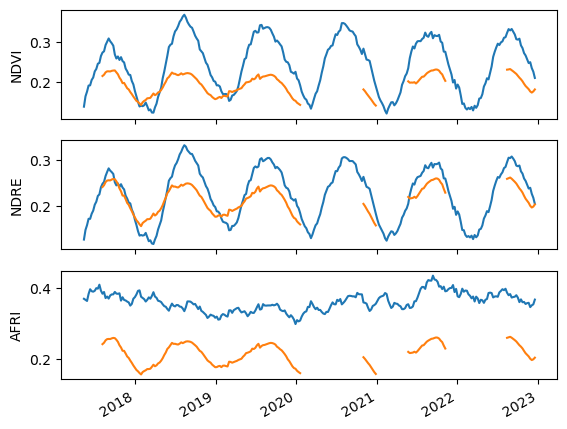

In [24]:
fig, axs = plt.subplots(3, sharex=True)

masked_means = [ndvi_masked_mean, ndre_masked_mean, afri_masked_mean]
means = [ndvi_mean, ndre_mean, adri_mean]


for (ax, masked_mean, mean) in zip(axs, masked_means, means):
    mean.rolling(time=20).mean().plot(ax =ax)
    masked_mean.rolling(time=20).mean().plot(ax =ax)
    ax.set_xlabel('')
    

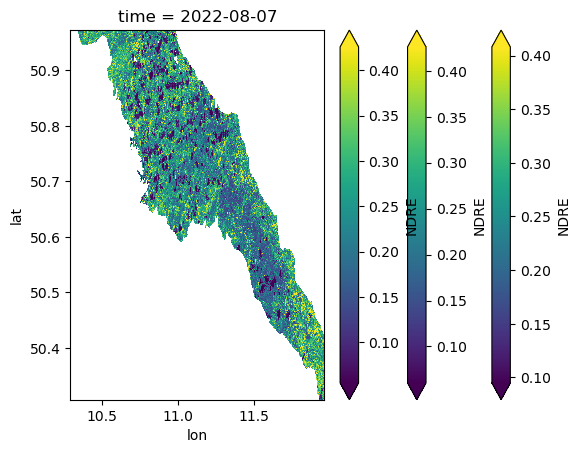

In [31]:
xarray_NDRE_masked.sortby('time').sel(time='2022-08-30', method='nearest').plot(robust=True)
xarray_NDRE_masked.sortby('time').sel(time='2022-08-22', method='nearest').plot(robust=True)
xarray_NDRE_masked.sortby('time').sel(time='2022-08-10', method='nearest').plot(robust=True)

In [52]:
xarray_AFRI_masked.time.shape[0] / 6 / 13

4.0

In [55]:
NDRE_coarsed = xarray_NDRE_masked.sortby('time').coarsen(time=13).mean()
AFRI_coarsed = xarray_AFRI_masked.sortby('time').coarsen(time=13).mean()
NDVI_coarsed = xarray_NDVI_masked.sortby('time').coarsen(time=13).mean()

In [58]:
(NDRE_coarsed - AFRI_coarsed).mean()

<xarray.DataArray ()>
array(0.)

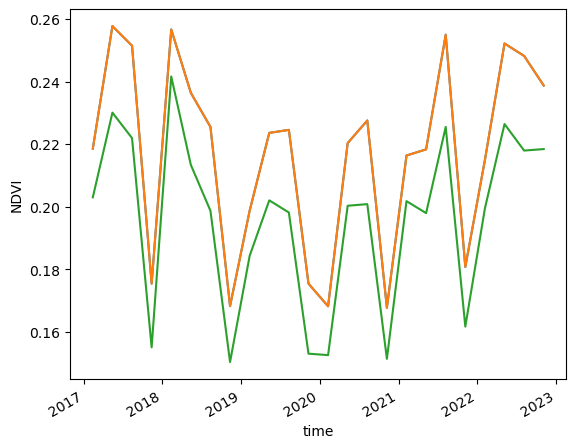

In [56]:
NDRE_coarsed.mean(dim=['lat', 'lon']).plot()
AFRI_coarsed.mean(dim=['lat', 'lon']).plot()
NDVI_coarsed.mean(dim=['lat', 'lon']).plot()

In [173]:
ds = pd.DataFrame(data_dict)
ds = ds.sort_values(by='time')
season = ((ds['time'].dt.month % 12 + 3) // 3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})
ds['season'] = season
#ds['index'] = ds['time']

KeyError: 'NDVI_mean'

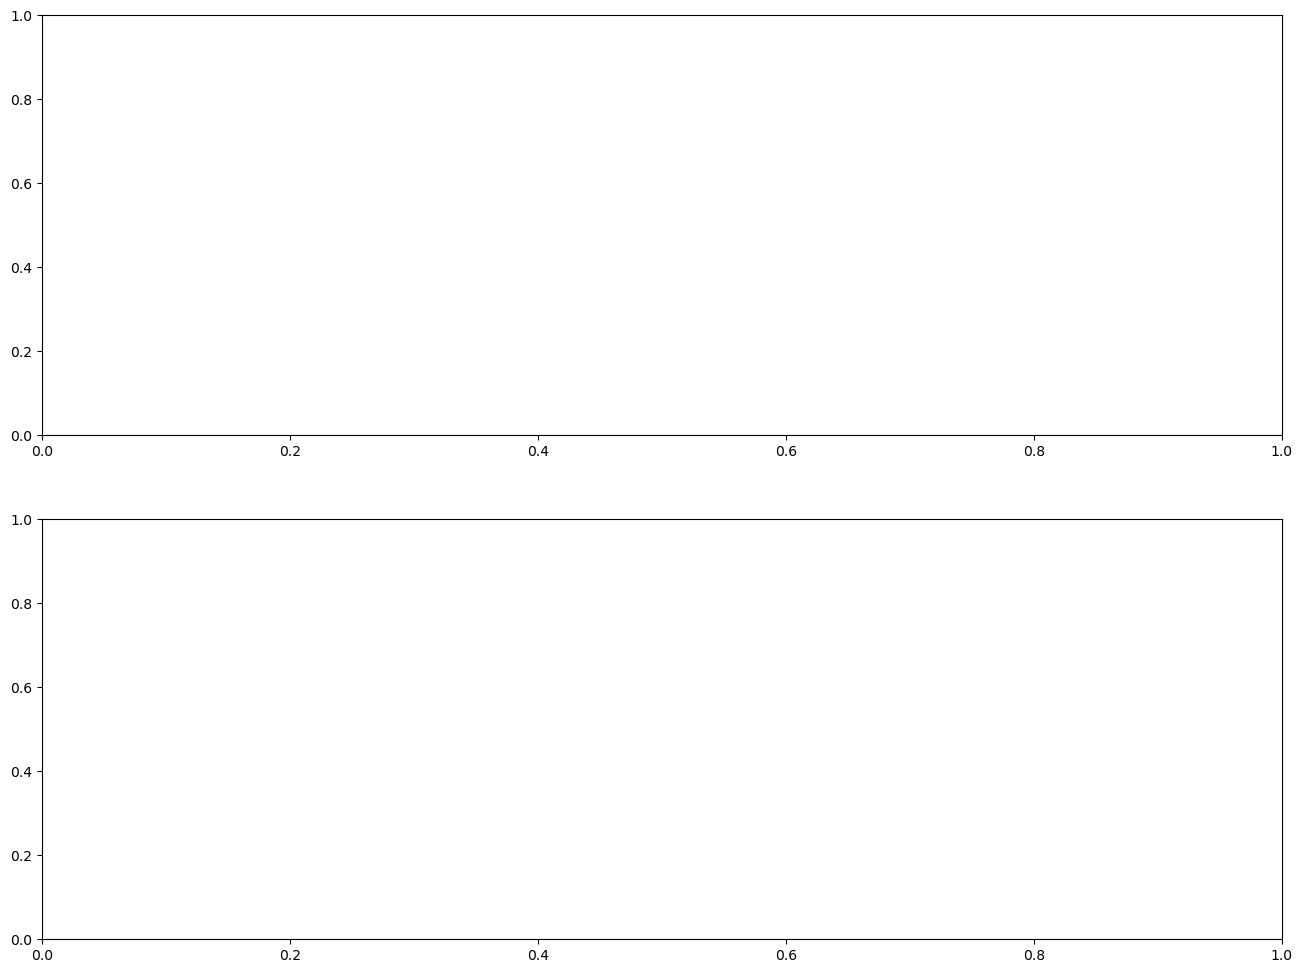

In [174]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot the data for each season on the same axis
ndvi_djf = ds['NDVI_mean'][season == 'DJF'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='DJF')
ndvi_mam = ds['NDVI_mean'][season == 'MAM'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='MAM')
ndvi_jja = ds['NDVI_mean'][season == 'JJA'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='JJA')
ndvi_son = ds['NDVI_mean'][season == 'SON'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='SON')

# Add a legend to the plot
ax1.legend(['JJA', 'MAM', 'SON', 'DJF'])
# Add a title to the plot
ax1.set_title('NDVI of D48 grouped by Season')

# Add x and y-axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('NDVI')
ax2.set_xlabel('Year')
ax2.set_ylabel('NDVI')



ax2.plot(ds['time' ], ds['NDVI_mean']+ds['NDVI_std'], marker='^', linestyle='--', linewidth=.1, color='k', markersize=1)
ax2.plot(ds['time' ], ds['NDVI_mean'], 'ro-')
ax2.plot(ds['time' ], ds['NDVI_mean']-ds['NDVI_std'], marker='v', linestyle='--', linewidth=.1,color='k', markersize=1)
ax2.set_title(r'NDVI for masked region D48 with Cloudmask \n time resolution = monthly; plotted is the mean NDVI in red within 1 standard-deviation')
plt.show()

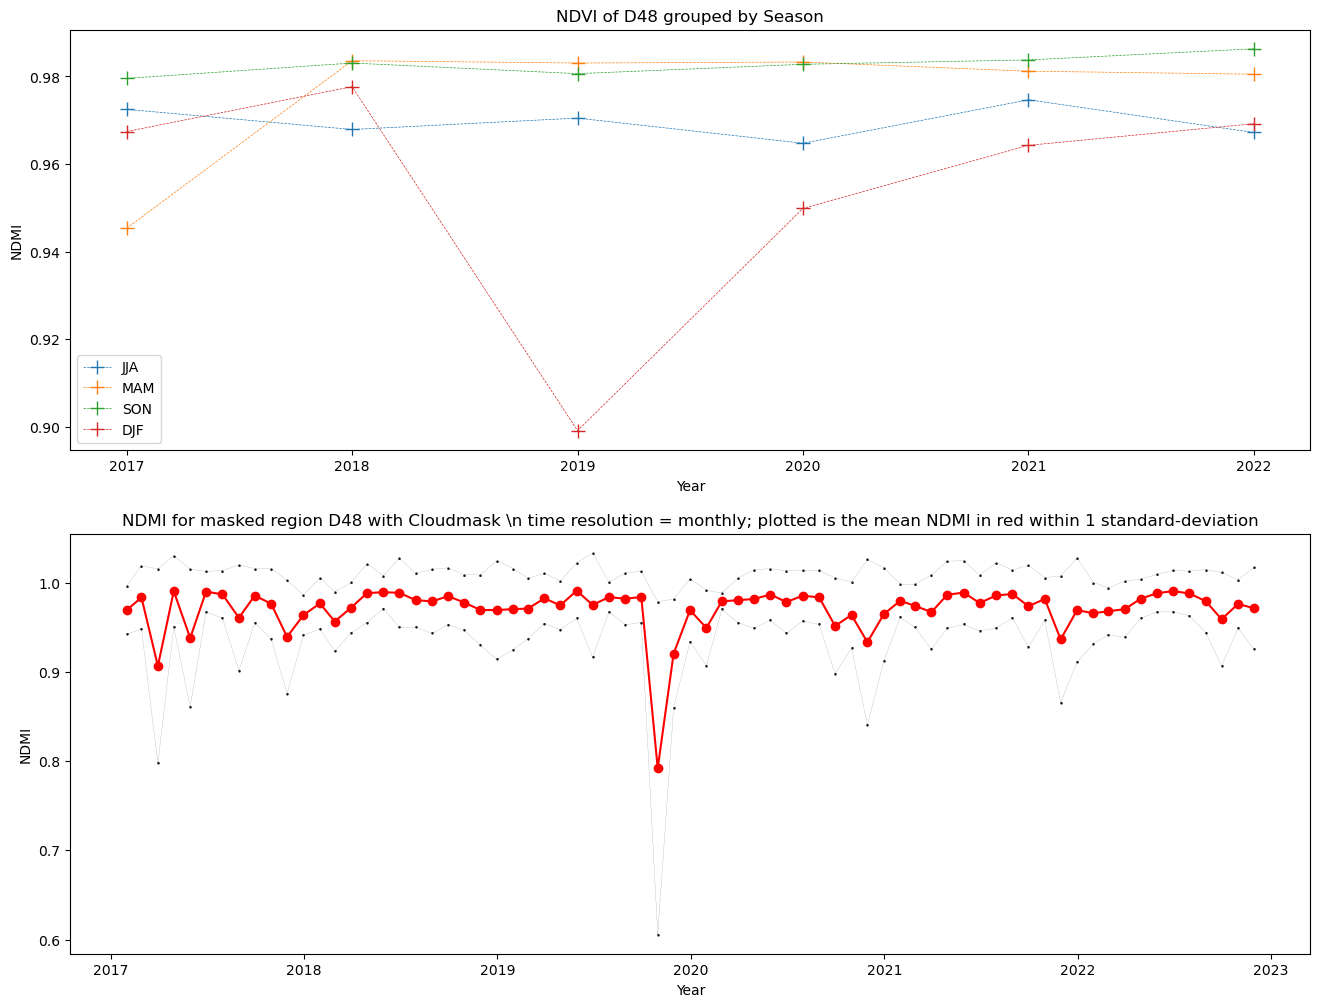

In [437]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot the data for each season on the same axis
ndvi_djf = ds['NDMI_mean'][season == 'DJF'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='DJF')
ndvi_mam = ds['NDMI_mean'][season == 'MAM'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='MAM')
ndvi_jja = ds['NDMI_mean'][season == 'JJA'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='JJA')
ndvi_son = ds['NDMI_mean'][season == 'SON'].groupby(ds.time.dt.year).mean().plot(ax=ax1, linestyle='--', marker='+', linewidth= .5, markersize=10, label='SON')

# Add a legend to the plot
ax1.legend(['JJA', 'MAM', 'SON', 'DJF'])
# Add a title to the plot
ax1.set_title('NDVI of D48 grouped by Season')

# Add x and y-axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('NDMI')
ax2.set_xlabel('Year')
ax2.set_ylabel('NDMI')



ax2.plot(ds['time' ], ds['NDMI_mean']+ds['NDMI_std'], marker='^', linestyle='--', linewidth=.1, color='k', markersize=1)
ax2.plot(ds['time' ], ds['NDMI_mean'], 'ro-')
ax2.plot(ds['time' ], ds['NDMI_mean']-ds['NDMI_std'], marker='v', linestyle='--', linewidth=.1,color='k', markersize=1)
ax2.set_title(r'NDMI for masked region D48 with Cloudmask \n time resolution = monthly; plotted is the mean NDMI in red within 1 standard-deviation')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


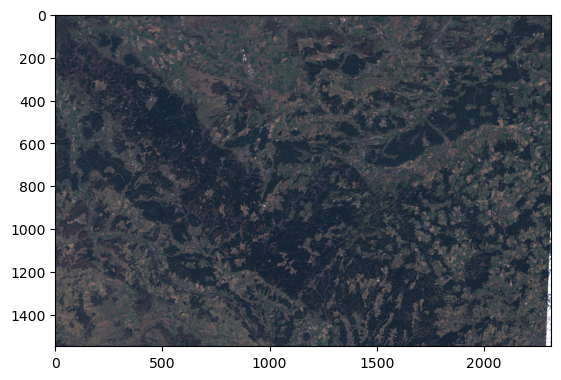

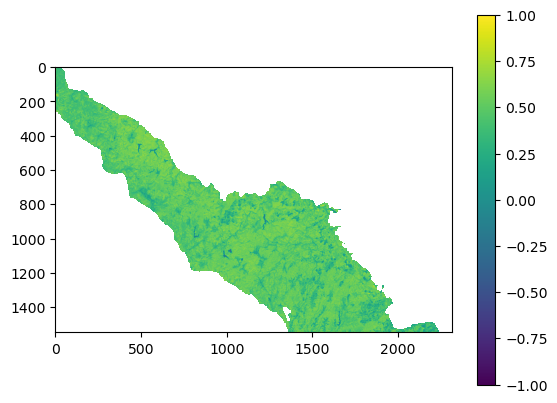

In [195]:
with rasterio.open(image_path) as dataset:
    red_channel = dataset.read(4) / 10000
    green_channel = dataset.read(3) / 25500
    blue_channel = dataset.read(2) / 25500
    nir_channel = dataset.read(8) / 25500

    masked_red = np.ma.array(red_channel, mask=mask_all)
    masked_blue = np.ma.array(blue_channel, mask=mask_all)
    masked_green = np.ma.array(green_channel, mask=mask_all)
    masked_nir = np.ma.array(nir_channel, mask=mask_all)

    ndvi = (masked_nir - masked_red ) / (masked_nir + masked_red)

    plt.imshow(7.5 * np.dstack((masked_red, masked_green, masked_blue)))
    #plt.savefig(f'{quicklook_dir}{folder}.png')
    plt.figure()

    plt.imshow(ndvi)
    plt.colorbar()